# Лабораторная работа 4

0        1
2        3
3        4
4        5
5        6
      ... 
738    739
739    740
740    741
741    742
742    743
Name: hour, Length: 735, dtype: int64 0      2272.0
2      1386.0
3      1365.0
4      1488.0
5      1337.0
        ...  
738    4970.0
739    4813.0
740    5392.0
741    5906.0
742    4881.0
Name: n_requests, Length: 735, dtype: float64


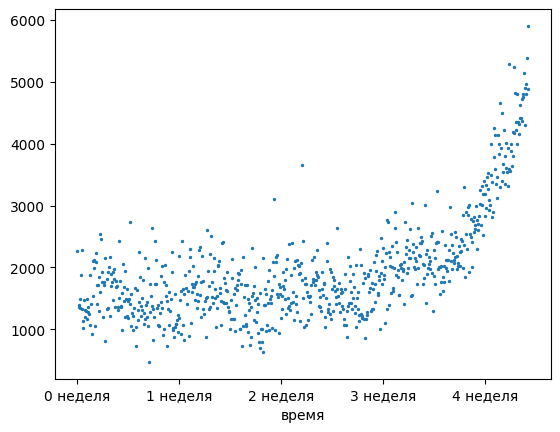

Параметры модели [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
[0.7437366099834488] 189592.0326962248 435.4216722858714


In [ ]:
import pandas as pd
import numpy as np
from numpy import isnan
import matplotlib.pyplot as plt

data = pd.read_csv('web_traffic.tsv', delimiter = '\t', names = ['hour', 'n_requests'])
input_var = 'hour'
target_var = 'n_requests'

hours_data = data[input_var]
requests_data = data[target_var]

# TODO: Использовать функцию notna()
hours_data = hours_data[pd.notna(requests_data)]
requests_data = requests_data[pd.notna(requests_data)]
# hours_data = hours_data[~isnan(requests_data)]
# requests_data = requests_data[~isnan(requests_data)]

print(hours_data, requests_data)

# Визуализация
plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')
plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])
plt.autoscale(tight=False)
plt.show()

f2p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)

print("Параметры модели {}".format(f2p))

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

fx = np.poly1d(f2p)
r2_array = []  # здесь будут храниться значения точности
r2_array.append(r2_score(requests_data,  fx(hours_data)))
rmse = mean_squared_error(requests_data, fx(hours_data), squared=False)
mse = mean_squared_error(requests_data,  fx(hours_data), squared=True)

print(r2_array, mse, rmse)



([<matplotlib.axis.XTick at 0x7fabdf0faef0>,
 [Text(0, 0, '0 неделя'),
  Text(168, 0, '1 неделя'),
  Text(336, 0, '2 неделя'),
  Text(504, 0, '3 неделя'),
  Text(672, 0, '4 неделя'),
  Text(840, 0, '5 неделя')])

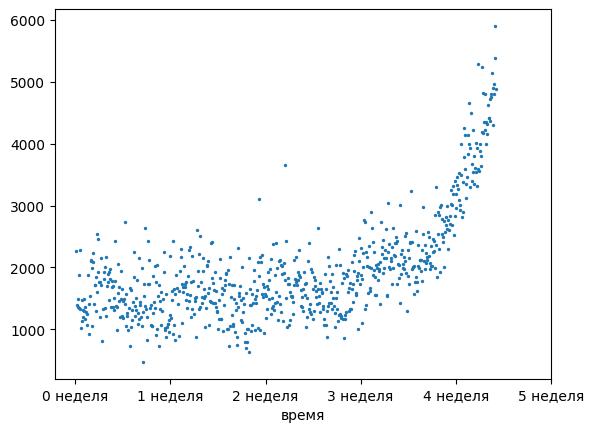

In [ ]:
# Визуализация
plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')
plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

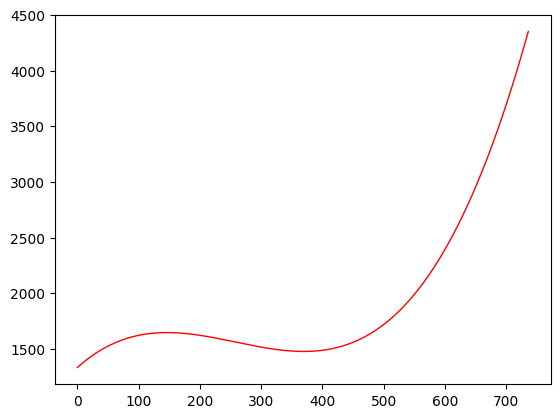

In [ ]:
# отобразим модель #1
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='red')
plt.autoscale(tight=False)
plt.show()

Степень полинома 1 MSE = 431822.81 RMSE = 657.13 MAE = 504.88
Степень полинома 2 MSE = 244875.52 RMSE = 494.85 MAE = 389.27
Степень полинома 3 MSE = 189592.03 RMSE = 435.42 MAE = 344.1
Степень полинома 5 MSE = 169339.75 RMSE = 411.51 MAE = 325.14
Степень полинома 10 MSE = 168070.76 RMSE = 409.96 MAE = 324.36
Степень полинома 20 MSE = 166641.71 RMSE = 408.22 MAE = 323.73


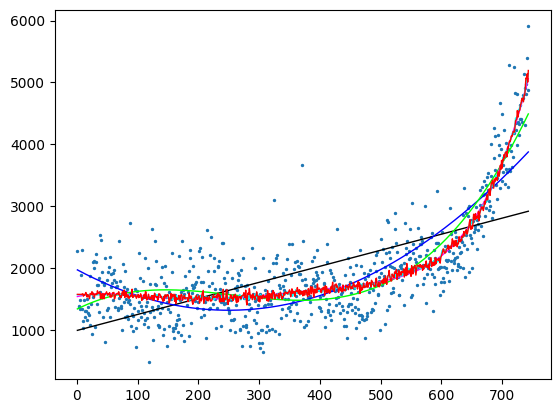

In [ ]:
# список степеней p полиномов, который мы протестируем
degree_list = [1, 2, 3, 5, 10, 20]
degree_color = ['black', 'blue', 'lime', 'magenta', 'cyan', 'red']

from sklearn.linear_model import LinearRegression

def generate_degrees(source_data: list, degree: int):

    return np.array([
          source_data**n for n in range(1, degree + 1)
    ]).T

plt.scatter(hours_data, requests_data, s=2)

for degree in degree_list:

    X = generate_degrees(hours_data, degree)

    model = LinearRegression().fit(X, requests_data)
    y_pred = model.predict(X)

    MSE = round(mean_squared_error(requests_data, y_pred), 2)
    RMSE = round(MSE**(1/2),2)
    MAE = round(mean_absolute_error(requests_data, y_pred),2)

    print(f"Степень полинома {degree} MSE = {MSE} RMSE = {RMSE} MAE = {MAE}")

    col = degree_color[degree_list.index(degree)]
    plt.plot(hours_data, y_pred, linewidth=1.0, color=col)

# Лабораторная работа 5

###Учебный пример (обучение - от 3,5 недель до 4,2 недель; тестирование - от 4,2 недель до конца данных)

In [ ]:
train_border = 3.5
final_border = 4.2

train_data  = int(train_border * 7 * 24) # 588
final_border = int(final_border * 7 * 24)

# print(divider)
# train set
hours_data_1, requests_data_1 = hours_data[train_data:final_border], requests_data[train_data:final_border]
# test set
hours_data_2, requests_data_2 = hours_data[final_border:], requests_data[final_border:]
print(requests_data_1.shape)
print(requests_data_2.shape)

(117,)
(30,)


In [ ]:
f2p_1, residuals_1, rank_1, sv_1, rcond_1 = np.polyfit(hours_data_1, requests_data_1, 3, full=True)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_1(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

[-0.04562453699059543] 258011.51302650385 507.9483369659791


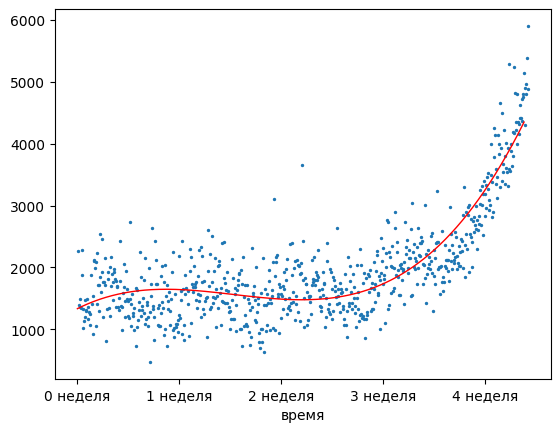

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

# отобразим модель #1
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='red')

plt.autoscale(tight=False)

plt.show()

## Пример 1. Разбиение выборки на две части по принципу 90/10, где первые 9 значений из десяти попадают в одну часть, а оставшийся один - в другую.

In [ ]:
divider = 9
hours_data_1 = [hours_data[divider - 9:divider]]
requests_data_1 = [requests_data[divider - 9:divider]]
k1=1
k2=10
while divider + k2 < len(hours_data):
  hours_data_1.append(hours_data[divider + k1:divider + k2])
  requests_data_1.append(requests_data[divider + k1:divider + k2])
  k1 += 10
  k2 += 10

# train set
hours_data_1, requests_data_1 = pd.concat(hours_data_1), pd.concat(requests_data_1)

# test set
hours_data_2, requests_data_2 = hours_data[9::10], requests_data[9::10]
print(requests_data_1.shape)
print(requests_data_2.shape)

(657,)
(73,)


In [ ]:
f2p_1, residuals_1, rank_1, sv_1, rcond_1 = np.polyfit(hours_data_1, requests_data_1, 3, full=True)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_1(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

[0.7715767192902395] 151521.64843330195 389.2578174337697


## Пример. Данные для обучения взяты из выборки, начиная с самого начала и до 4 недель, а данные для тестирования - от 4-ой недели до конца.

In [ ]:
divider = 3.7

divider_data  = int(divider * 7 * 24) # 588

# train set
hours_data_1, requests_data_1 = hours_data[:divider_data], requests_data[:divider_data]
# test set
hours_data_2, requests_data_2 = hours_data[divider_data:], requests_data[divider_data:]
print(requests_data_1.shape)
print(requests_data_2.shape)

(621,)
(114,)


In [ ]:
f2p_1, residuals_1, rank_1, sv_1, rcond_1 = np.polyfit(hours_data_1, requests_data_1, 3, full=True)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_1(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

[-0.5963934308084315] 1230750.2490042278 1109.3918374515956


# Ответить развернуто и пояснить ответ на вопрос ниже:

***Какая модель для гипотезы, при которой весь набор данных представляет собой два диапазона значений (например, от 0 недели до 3.5 недели и с 3.5 недели до конца или какой-то другой диапазон/граница), подходит наилучшим образом?***

Выбор дробления выборки по принципу 90/10 - первые 9 значений из десяти в одну выборку, а оставшийся один - в другую, позволяет достаточно эффективно использовать данные для обучения модели. Это подтверждается результатами расчетов: **значение среднеквадратической ошибки (MSE) составляет 389.2578174337697**, а **квадратный корень из среднеквадратической ошибки (RMSE) равен 151521.64843330195**. Такое разбиение выборки позволяет сохранить равномерное распределение данных по неделям и при этом получить меньшую ошибку на тестовых данных. Однако, необходимо учитывать специфику конкретной задачи и характеристики исходных данных, чтобы выбрать наилучший метод разбиения выборки.